<a href="https://colab.research.google.com/github/Parths131/traffic-forecasting/blob/main/sarima_chennai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving blr-traffic-data.csv to blr-traffic-data.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from datetime import timedelta
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [112]:
path = '/content/blr-traffic-data.csv'
df = pd.read_csv(path)

In [113]:
order = (1,1,1)
seasonal_order = (1,1,1,12)

In [114]:
df_excluded = df[['Month','che1']]
df_excluded = df_excluded[33:107]

In [115]:
df_excluded

,Month,che1
33,Jan-14,"7,14,088"
34,Feb-14,"6,57,684"
35,Mar-14,"6,79,094"
36,Apr-14,"6,89,365"
37,May-14,"8,09,313"
...,...,...
102,Oct-19,"13,79,897"
103,Nov-19,"14,87,523"
104,Dec-19,"15,45,835"
105,Jan-20,"15,20,275"


In [116]:
df_excluded['Month'] = pd.to_datetime(df_excluded['Month'], format='%b-%y')

In [117]:
df_excluded['che1'] = df_excluded['che1'].str.replace(',', '').astype(int)

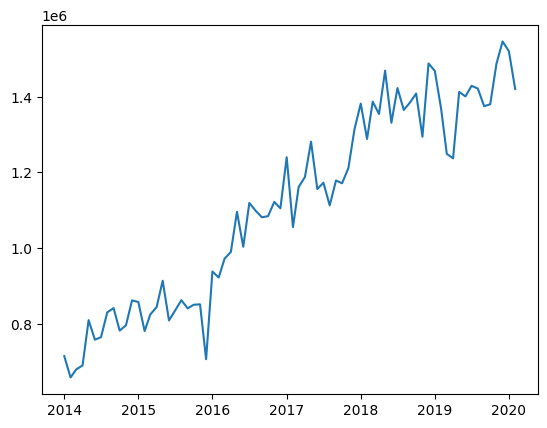

In [118]:
plt.plot(df_excluded['Month'], df_excluded['che1'])

In [119]:
adf_test = adfuller(df_excluded['che1'].diff().dropna())

print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

ADF Statistic: -8.042484121769514
p-value: 1.831229453001674e-12


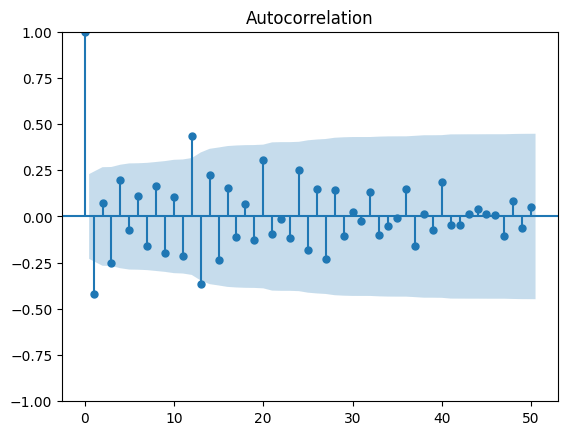

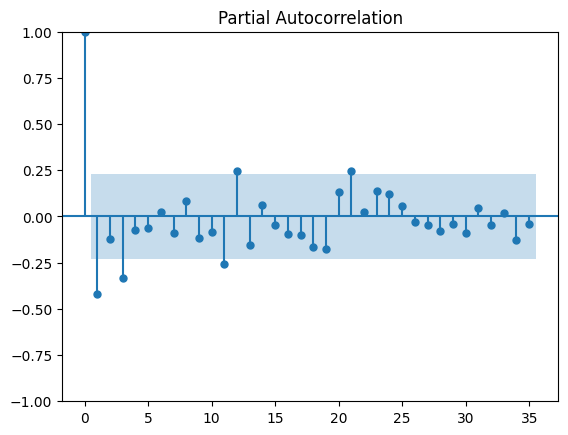

In [120]:
acf_original = plot_acf(df_excluded['che1'].diff().dropna(), lags=50)

pacf_original = plot_pacf(df_excluded['che1'].diff().dropna(), lags=35)

In [121]:
test_start = datetime(2019, 8, 1)
df_train = df_excluded[(df_excluded['Month'] < test_start)]

In [122]:
df_test = df_excluded[(df_excluded['Month'] >= test_start)]

In [123]:
testing_range = pd.date_range(start=datetime(2019, 8, 1), end=datetime(2020, 2, 1), freq='MS')

model = SARIMAX(df_train['che1'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

testing = model_fit.forecast(steps=len(testing_range))

testing_df = pd.DataFrame({'Month': testing_range, 'che1': testing})

print(testing_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


        Month          che1
67 2019-08-01  1.367946e+06
68 2019-09-01  1.400910e+06
69 2019-10-01  1.413485e+06
70 2019-11-01  1.352889e+06
71 2019-12-01  1.511644e+06
72 2020-01-01  1.524344e+06
73 2020-02-01  1.424780e+06


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [124]:
testing_df = testing_df.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [125]:
rmse = np.sqrt(np.mean((df_test['che1'] - testing_df['che1']) ** 2))

mae = np.mean(np.abs(df_test['che1'] - testing_df['che1']))

rmse, mae

(58573.54181970639, 41564.866467407905)

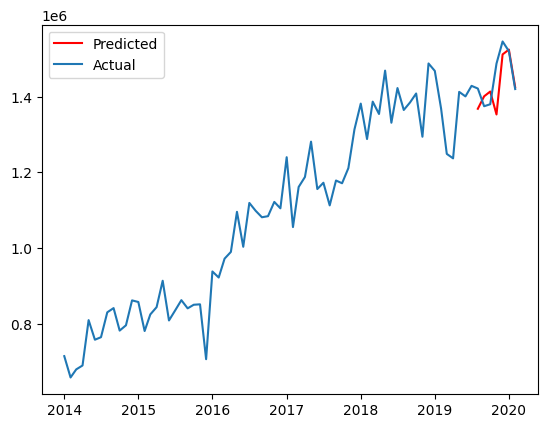

In [126]:
plt.plot(testing_df['Month'], testing_df['che1'], label='Predicted', color='red')
plt.plot(df_excluded['Month'], df_excluded['che1'], label='Actual')
plt.legend()

In [127]:
forecast_range = pd.date_range(start=datetime(2020, 3, 1), end=datetime(2049, 12, 31), freq='MS')

model = SARIMAX(df_excluded['che1'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

predictions = model_fit.forecast(steps=len(forecast_range))

predictions_df = pd.DataFrame({'Month': forecast_range, 'che1': predictions})

print(predictions_df)

         Month          che1
107 2020-03-01  1.404640e+06
108 2020-04-01  1.392159e+06
109 2020-05-01  1.537634e+06
110 2020-06-01  1.470577e+06
111 2020-07-01  1.521003e+06
..         ...           ...
460 2049-08-01  3.846668e+06
461 2049-09-01  3.828523e+06
462 2049-10-01  3.837792e+06
463 2049-11-01  3.875108e+06
464 2049-12-01  3.972127e+06

[358 rows x 2 columns]


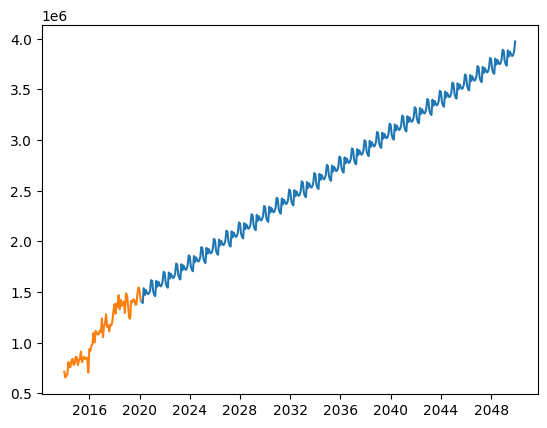

In [128]:
plt.plot(predictions_df['Month'], predictions_df['che1'], label='Predicted')
plt.plot(df_excluded['Month'], df_excluded['che1'], label='Predicted')

In [129]:
predictions_df

,Month,che1
107,2020-03-01,1.404640e+06
108,2020-04-01,1.392159e+06
109,2020-05-01,1.537634e+06
110,2020-06-01,1.470577e+06
111,2020-07-01,1.521003e+06
...,...,...
460,2049-08-01,3.846668e+06
461,2049-09-01,3.828523e+06
462,2049-10-01,3.837792e+06
463,2049-11-01,3.875108e+06
